In [1]:
# Adapted from: https://github.com/lazyprogrammer/machine_learning_examples/blob/master/unsupervised_class3/
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

In [2]:
def get_mnist(limit=None):
  print("Reading in and transforming data...")
  df = pd.read_csv('large_files/train.csv')
  data = df.values
  # np.random.shuffle(data)
  X = data[:, 1:] / 255.0 # data is from 0..255
  Y = data[:, 0]
  X, Y = shuffle(X, Y)
  if limit is not None:
    X, Y = X[:limit], Y[:limit]
  return X, Y

In [3]:
class Autoencoder:
  def __init__(self, D, M):
    # represents a batch of training data
    self.X = tf.placeholder(tf.float32, shape=(None, D))

    # input -> hidden
    self.W = tf.Variable(tf.random_normal(shape=(D, M)) * np.sqrt(2.0 / M))
    self.b = tf.Variable(np.zeros(M).astype(np.float32))

    # hidden -> output
    self.V = tf.Variable(tf.random_normal(shape=(M, D)) * np.sqrt(2.0 / D))
    self.c = tf.Variable(np.zeros(D).astype(np.float32))

    # construct the reconstruction
    self.Z = tf.nn.relu(tf.matmul(self.X, self.W) + self.b)
    logits = tf.matmul(self.Z, self.V) + self.c
    self.X_hat = tf.nn.sigmoid(logits)

    # compute the cost
    self.cost = tf.reduce_sum(
      tf.nn.sigmoid_cross_entropy_with_logits(
        labels=self.X,
        logits=logits
      )
    )

    # make the trainer
    self.train_op = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(self.cost)

    # set up session and variables for later
    self.init_op = tf.global_variables_initializer()
    self.sess = tf.InteractiveSession()
    self.sess.run(self.init_op)

  def fit(self, X, epochs=30, batch_sz=64):
    costs = []
    n_batches = len(X) // batch_sz
    print("n_batches:", n_batches)
    for i in range(epochs):
      print("epoch:", i)
      np.random.shuffle(X)
      for j in range(n_batches):
        batch = X[j*batch_sz:(j+1)*batch_sz]
        _, c, = self.sess.run((self.train_op, self.cost), feed_dict={self.X: batch})
        c /= batch_sz # just debugging
        costs.append(c)
        if j % 100 == 0:
          print("iter: %d, cost: %.3f" % (j, c))
    plt.plot(costs)
    plt.show()

  def predict(self, X):
    return self.sess.run(self.X_hat, feed_dict={self.X: X})


Reading in and transforming data...


n_batches: 656
epoch: 0
iter: 0, cost: 562.779


iter: 100, cost: 112.674


iter: 200, cost: 84.798


iter: 300, cost: 79.738


iter: 400, cost: 73.239


iter: 500, cost: 68.941


iter: 600, cost: 64.686


epoch: 1
iter: 0, cost: 62.980


iter: 100, cost: 67.429


iter: 200, cost: 67.162


iter: 300, cost: 60.375


iter: 400, cost: 57.849


iter: 500, cost: 58.732


iter: 600, cost: 65.910


epoch: 2
iter: 0, cost: 58.697


iter: 100, cost: 60.627


iter: 200, cost: 60.833


iter: 300, cost: 55.419


iter: 400, cost: 58.939


iter: 500, cost: 56.423


iter: 600, cost: 63.066


epoch: 3
iter: 0, cost: 56.978


iter: 100, cost: 55.382


iter: 200, cost: 56.272


iter: 300, cost: 52.764


iter: 400, cost: 55.323


iter: 500, cost: 58.750


iter: 600, cost: 54.908


epoch: 4
iter: 0, cost: 53.397


iter: 100, cost: 57.245


iter: 200, cost: 52.412


iter: 300, cost: 53.262


iter: 400, cost: 54.501


iter: 500, cost: 53.409


iter: 600, cost: 53.978


epoch: 5
iter: 0, cost: 54.948


iter: 100, cost: 53.233


iter: 200, cost: 51.297


iter: 300, cost: 51.836


iter: 400, cost: 51.689


iter: 500, cost: 54.955


iter: 600, cost: 50.627


epoch: 6
iter: 0, cost: 55.040


iter: 100, cost: 49.201


iter: 200, cost: 54.281


iter: 300, cost: 55.890


iter: 400, cost: 54.082


iter: 500, cost: 52.648


iter: 600, cost: 54.550


epoch: 7
iter: 0, cost: 52.111


iter: 100, cost: 52.291


iter: 200, cost: 52.526


iter: 300, cost: 55.218


iter: 400, cost: 53.789


iter: 500, cost: 51.520


iter: 600, cost: 53.572


epoch: 8
iter: 0, cost: 55.990


iter: 100, cost: 53.627


iter: 200, cost: 53.272


iter: 300, cost: 51.731


iter: 400, cost: 52.172


iter: 500, cost: 54.840


iter: 600, cost: 52.255


epoch: 9
iter: 0, cost: 52.145


iter: 100, cost: 50.892


iter: 200, cost: 51.916


iter: 300, cost: 50.960


iter: 400, cost: 47.589


iter: 500, cost: 49.729


iter: 600, cost: 50.047


epoch: 10
iter: 0, cost: 53.638


iter: 100, cost: 52.468


iter: 200, cost: 53.518


iter: 300, cost: 55.403


iter: 400, cost: 56.619


iter: 500, cost: 53.081


iter: 600, cost: 53.155


epoch: 11
iter: 0, cost: 51.736


iter: 100, cost: 50.533


iter: 200, cost: 53.761


iter: 300, cost: 54.346


iter: 400, cost: 53.924


iter: 500, cost: 53.966


iter: 600, cost: 51.553


epoch: 12
iter: 0, cost: 52.708


iter: 100, cost: 53.800


iter: 200, cost: 55.410


iter: 300, cost: 49.349


iter: 400, cost: 52.228


iter: 500, cost: 49.922


iter: 600, cost: 49.450


epoch: 13
iter: 0, cost: 51.829


iter: 100, cost: 54.843


iter: 200, cost: 54.747


iter: 300, cost: 52.211


iter: 400, cost: 50.979


iter: 500, cost: 53.218


iter: 600, cost: 51.271


epoch: 14
iter: 0, cost: 50.550


iter: 100, cost: 51.432


iter: 200, cost: 51.067


iter: 300, cost: 50.367


iter: 400, cost: 51.492


iter: 500, cost: 47.290


iter: 600, cost: 51.753


epoch: 15
iter: 0, cost: 51.122


iter: 100, cost: 51.971


iter: 200, cost: 50.092


iter: 300, cost: 49.759


iter: 400, cost: 51.328


iter: 500, cost: 49.485


iter: 600, cost: 51.925


epoch: 16
iter: 0, cost: 51.541


iter: 100, cost: 52.883


iter: 200, cost: 51.584


iter: 300, cost: 52.282


iter: 400, cost: 50.898


iter: 500, cost: 52.927


iter: 600, cost: 53.424


epoch: 17
iter: 0, cost: 51.045


iter: 100, cost: 50.341


iter: 200, cost: 51.633


iter: 300, cost: 51.207


iter: 400, cost: 52.405


iter: 500, cost: 51.467


iter: 600, cost: 50.909


epoch: 18
iter: 0, cost: 51.084


iter: 100, cost: 55.064


iter: 200, cost: 49.626


iter: 300, cost: 51.534


iter: 400, cost: 52.102


iter: 500, cost: 54.369


iter: 600, cost: 49.014


epoch: 19
iter: 0, cost: 51.045


iter: 100, cost: 50.400


iter: 200, cost: 54.181


iter: 300, cost: 50.346


iter: 400, cost: 50.377


iter: 500, cost: 49.931


iter: 600, cost: 51.499


epoch: 20
iter: 0, cost: 52.594


iter: 100, cost: 53.191


iter: 200, cost: 50.747


iter: 300, cost: 47.318


iter: 400, cost: 51.521


iter: 500, cost: 49.479


iter: 600, cost: 52.552


epoch: 21
iter: 0, cost: 51.962


iter: 100, cost: 49.704


iter: 200, cost: 53.063


iter: 300, cost: 51.754


iter: 400, cost: 52.668


iter: 500, cost: 52.322


iter: 600, cost: 51.513


epoch: 22
iter: 0, cost: 49.745


iter: 100, cost: 50.701


iter: 200, cost: 51.891


iter: 300, cost: 51.818


iter: 400, cost: 50.449


iter: 500, cost: 52.890


iter: 600, cost: 49.838


epoch: 23
iter: 0, cost: 52.718


iter: 100, cost: 50.059


iter: 200, cost: 52.216


iter: 300, cost: 49.970


iter: 400, cost: 48.838


iter: 500, cost: 50.149


iter: 600, cost: 50.201


epoch: 24
iter: 0, cost: 52.449


iter: 100, cost: 49.217


iter: 200, cost: 51.610


iter: 300, cost: 50.677


iter: 400, cost: 50.636


iter: 500, cost: 51.582


iter: 600, cost: 47.814


epoch: 25
iter: 0, cost: 50.558


iter: 100, cost: 50.611


iter: 200, cost: 50.012


iter: 300, cost: 49.059


iter: 400, cost: 52.840


iter: 500, cost: 52.677


iter: 600, cost: 50.113


epoch: 26
iter: 0, cost: 50.665


iter: 100, cost: 52.124


iter: 200, cost: 48.820


iter: 300, cost: 55.523


iter: 400, cost: 50.067


iter: 500, cost: 51.820


iter: 600, cost: 49.761


epoch: 27
iter: 0, cost: 52.247


iter: 100, cost: 50.653


iter: 200, cost: 49.586


iter: 300, cost: 48.043


iter: 400, cost: 48.868


iter: 500, cost: 50.946


iter: 600, cost: 51.115


epoch: 28
iter: 0, cost: 51.058


iter: 100, cost: 49.320


iter: 200, cost: 49.693


iter: 300, cost: 51.809


iter: 400, cost: 48.870


iter: 500, cost: 48.544


iter: 600, cost: 49.747


epoch: 29
iter: 0, cost: 50.101


iter: 100, cost: 47.712


iter: 200, cost: 54.739


iter: 300, cost: 53.248


iter: 400, cost: 50.569


iter: 500, cost: 53.802


iter: 600, cost: 50.446


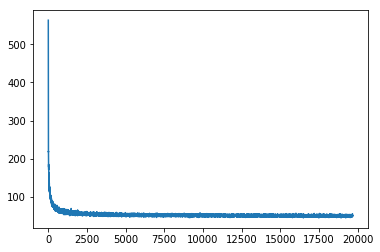

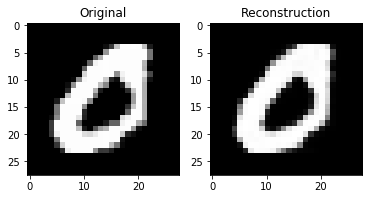

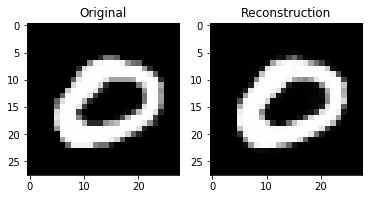

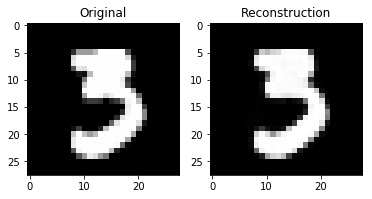

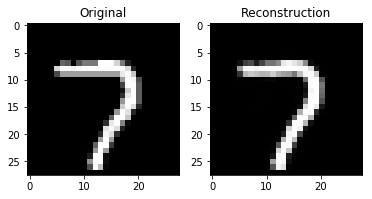

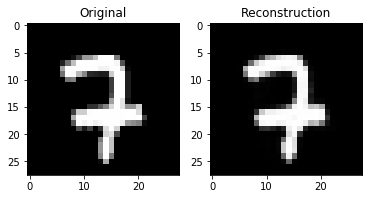

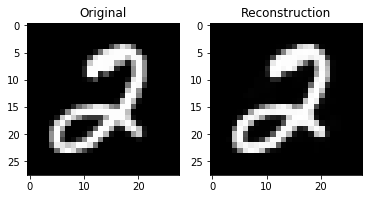

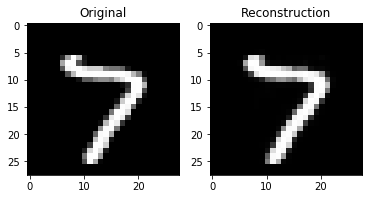

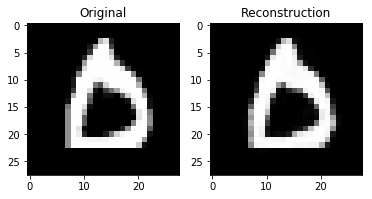

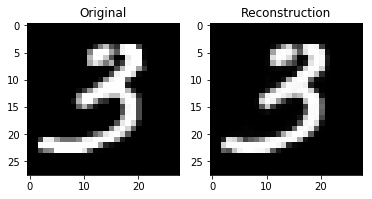

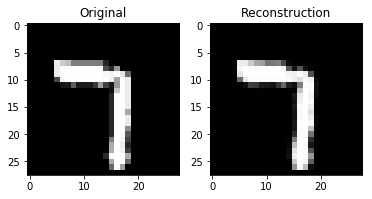

In [4]:
if __name__ == '__main__':
  X, Y = get_mnist()

  model = Autoencoder(784, 300)
  model.fit(X)

  # plot reconstruction
  counter=0
  while counter<10:
    counter+=1
    i = np.random.choice(len(X))
    x = X[i]
    im = model.predict([x]).reshape(28, 28)
    plt.subplot(1,2,1)
    plt.imshow(x.reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.subplot(1,2,2)
    plt.imshow(im, cmap='gray')
    plt.title("Reconstruction")
    plt.show()

